# Machine learning project 01
## By Avinash A Godi

In [24]:
import sys
import keyword
import operator
from datetime import datetime
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sidetable
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Basic Understanding of The Data

## Read in the file and get basic information about the data, including numerical summaries

In [25]:
df=pd.read_csv("bank-marketing.csv")

In [26]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


From the above cell we are clear that none of the columns have null value

In [28]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [29]:
df.shape

(45211, 19)

In [30]:
df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [31]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [32]:
df.describe(include = 'O')

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,2,3,12,4,2
top,blue-collar,married,secondary,yes,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,37091,44396,25130,37967,29285,13766,36959,39922


# Objective:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Use Machine Learning Algorithms to predict if the client will subscribe a term deposit.

## Attribute Information:

### Input variables:
Bank client data:

1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - salary:(numeric) salary of an individual

4 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

5 - education: (categorical: primary, secondary, tertiary and unknown)

6 - targeted

7 - default: has credit in default? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

9 - housing: has housing loan? (categorical: 'no','yes','unknown')

10 - loan: has personal loan? (categorical: 'no','yes','unknown')


#### Related with the Last Contact of the Current Campaign:
11 - contact: contact communication type (categorical: 'cellular','telephone')

12 - day: last contact day 

13 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


14 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then response='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call response is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other Attributes:
15 - campaign: number of contacts performed during this campaign and for this client(numeric, includes last contact)

16 - pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 means client was not previously contacted)

17 - previous: number of contacts performed before this campaign and for this client(numeric)

18 - poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')


## Output variable (desired target):
19 - response - has the client subscribed a term deposit? (binary: 'yes','no')

# Question 1
## Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

pdays: number of days that passed by after the client was last contacted from a previous campaign

In [33]:
df["pdays"].mean()

40.19782796222158

In [34]:
df["pdays"].median()

-1.0

In [35]:
df["pdays"].min()

-1

In [36]:
df["pdays"].max()

871

In [37]:
df["pdays"].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

from the above cells we are clear that it has -1 as 36954 rows and other 558 unique rows with maximum outlier
and it is clear that days passed cannot be -1 which means according to dataset -1 refers that no of days passed since last contact is zero hence value with -1 rows should be converted to 0

# Question 2
## Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [38]:
df["pdays"]=df["pdays"].replace([-1],0)

In [39]:
df["pdays"].value_counts()

0      36954
182      167
92       147
91       126
183      126
       ...  
449        1
452        1
648        1
595        1
530        1
Name: pdays, Length: 559, dtype: int64

In [40]:
df["pdays"].mean()

41.015195417044524

In [41]:
df["pdays"].median()

0.0

In [42]:
df["pdays"].min()

0

In [43]:
df["pdays"].max()

871

hence values are changed

# Question 3
## Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:xlabel='education', ylabel='balance'>

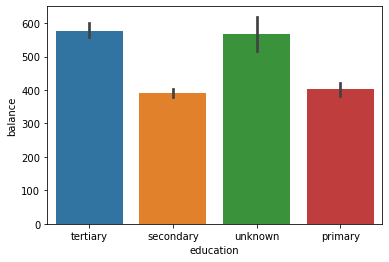

In [44]:
sns.barplot(x=df["education"], y=df["balance"], estimator= np.median)

# Question 4
## Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:xlabel='pdays'>

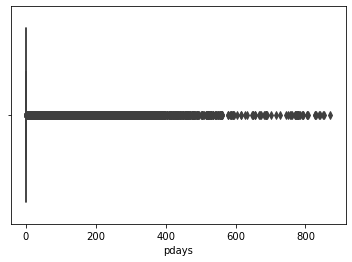

In [45]:
sns.boxplot(df["pdays"])

there are many outliers in pdays

In [46]:
#finding IQR and finding upper and lower limit
q1 = df["pdays"].quantile(0.25)
q3 = df["pdays"].quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [47]:
#finding outliers
df["pdays"] = np.where(df["pdays"]>upper,upper,np.where(df["pdays"]<lower,lower,df["pdays"]))

<AxesSubplot:xlabel='pdays'>

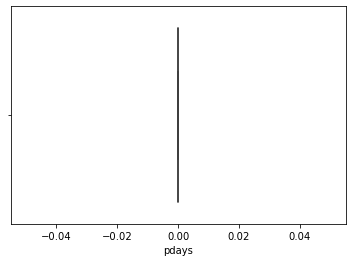

In [48]:
sns.boxplot(df["pdays"])

## The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.


## First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can refer to the notebook we used for the EDA discussion.
- Convert the response variable to a convenient form
- Make suitable plots for associations with numerical features and categorical features

### The correlation matrix is little hard to read. Let's plot it.

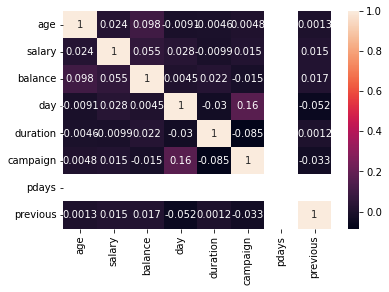

In [49]:
ax = sns.heatmap(df.corr(), annot=True)

# Question 5
## Convert the response variable to a convenient form
## Make suitable plots for associations with numerical features and categorical features’

In [50]:
#filter out the numerical variables and categorical variables
num_columns = []
cat_columns = []
for name, type in dict(df.dtypes).items():
        if type =='int64' or type == 'float64':
            num_columns.append(name)
        else:
            cat_columns.append(name)    

# Histogram of Numerical Variables

In [51]:
num_columns

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

IndexError: list index out of range

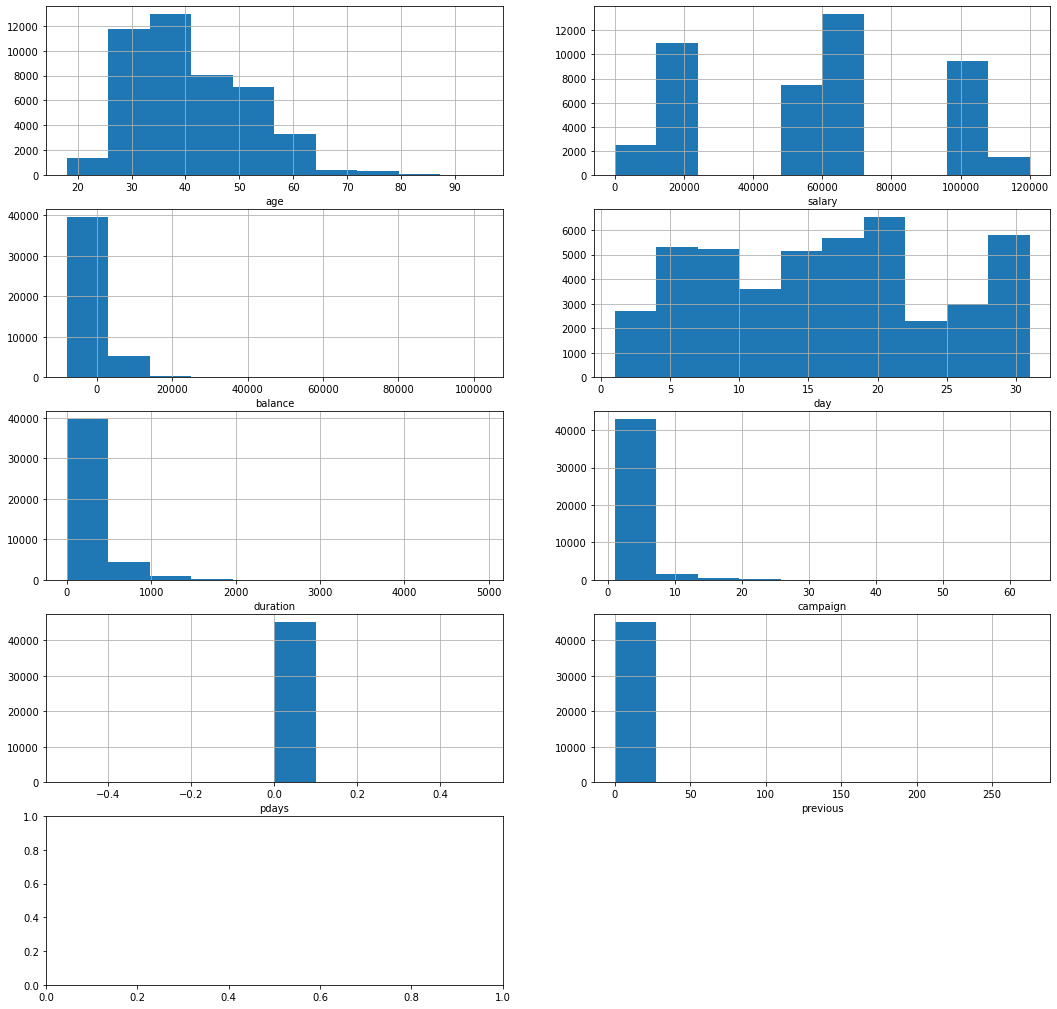

In [54]:
fig = plt.figure(figsize=(18,18))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = df[num_columns[r]].hist()
    ax.set_xlabel(num_columns[r])

### Bar Plot of Categorical Variables

In [55]:
cat_columns

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'response']

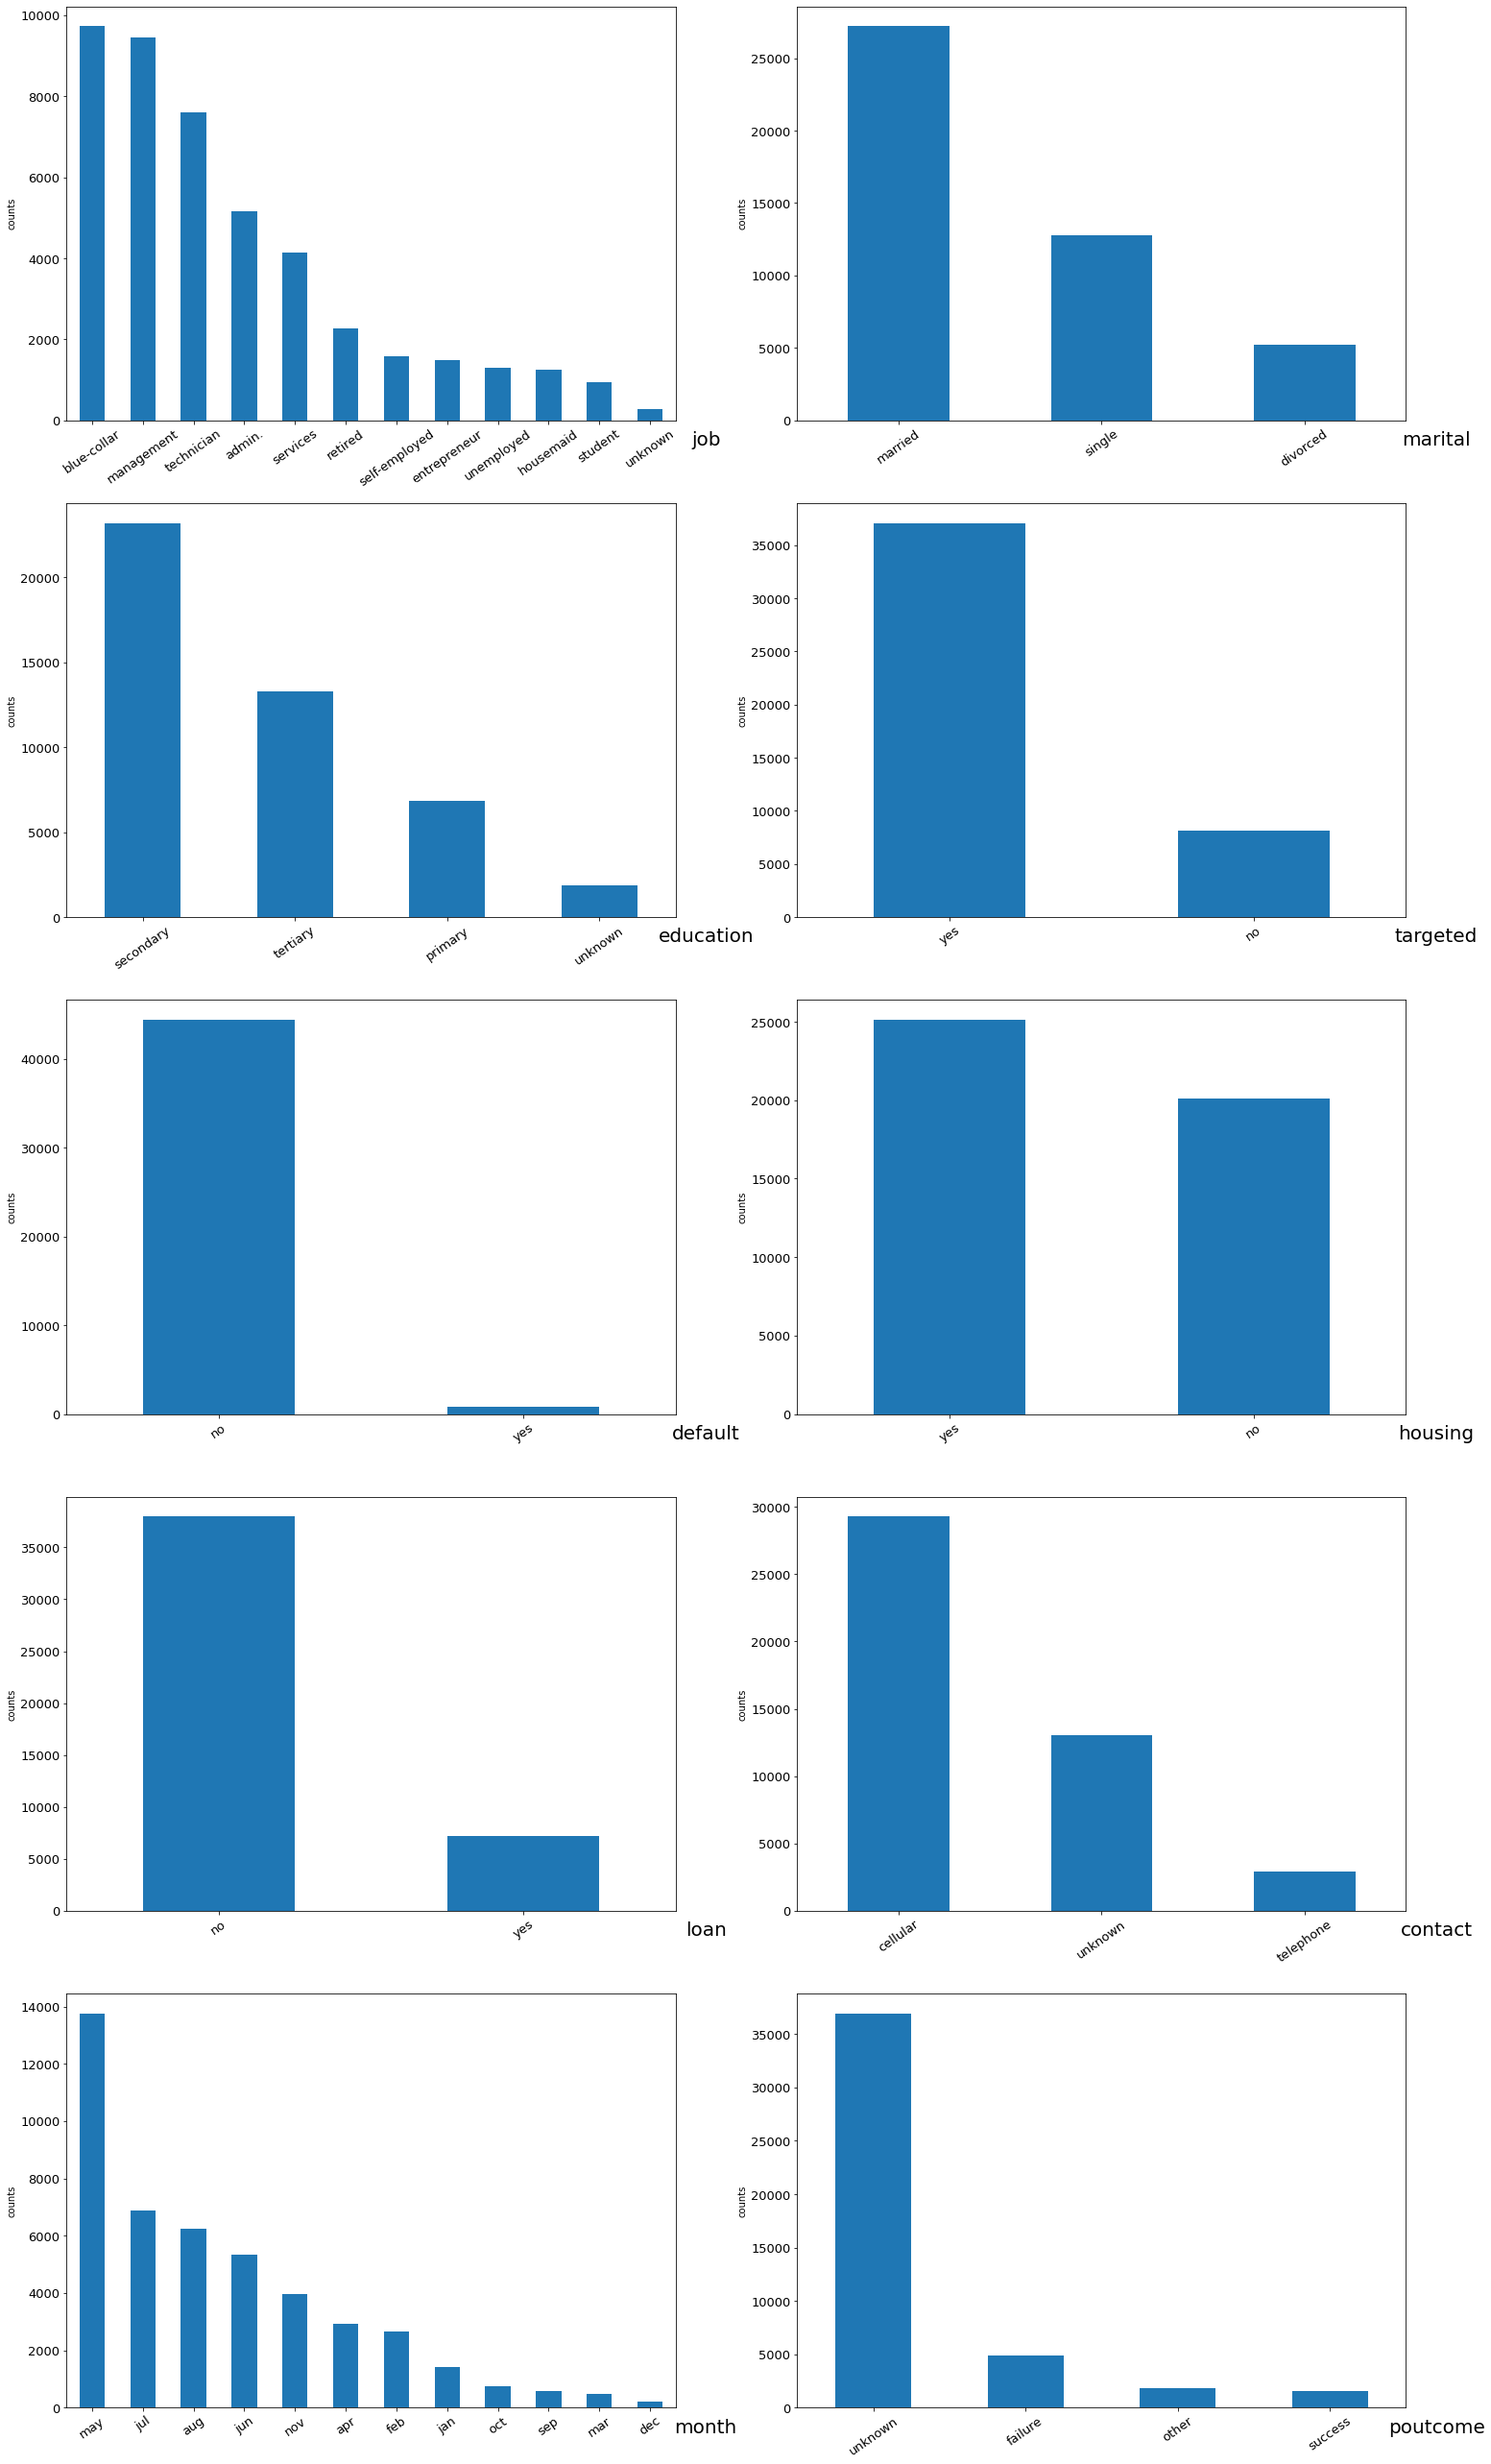

In [56]:
fig = plt.figure(figsize=(25,46))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = df[cat_columns[r]].value_counts().plot(kind = 'bar', rot=35, fontsize = 13)
    ax.set_xlabel(cat_columns[r],fontsize = 20)
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax.set_ylabel('counts')

### Plot the Target Variable

Text(0.5, 1.0, 'Percentage of response')

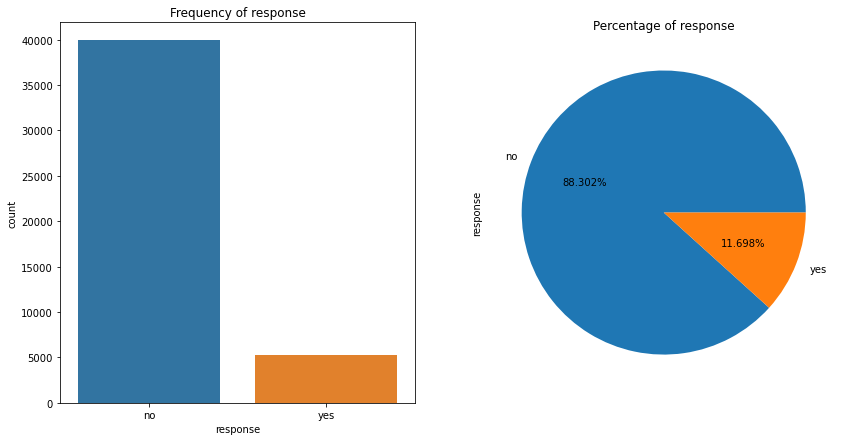

In [57]:
# Set figure size with matplotlib
fig, axs = plt.subplots(1,2,figsize=(14,7))
#create the frequency graph of Target variable deposit
sns.countplot(x='response',data=df, ax=axs[0])
axs[0].set_title("Frequency of response")
#create the pie graph of Target variable deposit in term of percentage
df.response.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.3f%%')
axs[1].set_title("Percentage of response")

Findings:
Age is the only variable that might have a normal distribution.
It looks like the target variable is imbalanced. It might affect certain machine learning algorithmn. We will resample the data and make the target variable balance.

## Preparing for Categorical Variables / Convert Categorical Variables to Numeric Features
#### Map Ordinal Values To Integers
#### Encode Nominal Values as Dummy Variables

In [58]:
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0:5])

            job  marital  education targeted default housing loan  contact  \
0    management  married   tertiary      yes      no     yes   no  unknown   
1    technician   single  secondary      yes      no     yes   no  unknown   
2  entrepreneur  married  secondary      yes      no     yes  yes  unknown   
3   blue-collar  married    unknown       no      no     yes   no  unknown   
4       unknown   single    unknown       no      no      no   no  unknown   

  month poutcome response  
0   may  unknown       no  
1   may  unknown       no  
2   may  unknown       no  
3   may  unknown       no  
4   may  unknown       no  


In [59]:
df_prepared = df.drop(['month'], axis = 1)

In [60]:
#response is Target Variable
cols = ['job', 'marital', 'education' , 'targeted', 'default', 'housing','loan', 'contact', 'poutcome']
for name in cols:
    print(name,':')
    print(df_prepared[name].value_counts(),'\n')

job :
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital :
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education :
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

targeted :
yes    37091
no      8120
Name: targeted, dtype: int64 

default :
no     44396
yes      815
Name: default, dtype: int64 

housing :
yes    25130
no     20081
Name: housing, dtype: int64 

loan :
no     37967
yes     7244
Name: loan, dtype: int64 

contact :
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

poutcome :
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64 



#### Nominal Levels:

job

marital

targeted

default

housing

loan

contact

poutcome

#### Ordinal Levels:
education

In [61]:
#Nomial
Nominal = ['job','marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'poutcome']
dummies = pd.get_dummies(df[Nominal])

df_prepared = pd.concat([df_prepared, dummies],axis=1)
df_prepared = df_prepared.drop(Nominal, axis = 1)


#Ordinal
mapping_dict = {
    "education": {
        "primary": 1,
        "secondary": 2,
        "tertiary": 3,
        "unknown": 0,
    }
}
df_prepared = df_prepared.replace(mapping_dict)

In [62]:
df_prepared.head()

,age,salary,education,balance,day,duration,campaign,pdays,previous,response,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,100000,3,2143,5,261,1,0.0,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
1,44,60000,2,29,5,151,1,0.0,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
2,33,120000,2,2,5,76,1,0.0,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1
3,47,20000,0,1506,5,92,1,0.0,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1
4,33,0,0,1,5,198,1,0.0,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


## Preparing for Numerical Variables
Input variable duration is highly affect the target variables. Therefore, I will remove it.

In [63]:
df_prepared = df_prepared.drop(['duration'], axis = 1)

## Converting target variable to boolean

In [64]:
df_prepared['response'] = df_prepared['response'].map(dict(yes=1, no=0))

In [65]:
df_prepared['response'].value_counts()

0    39922
1     5289
Name: response, dtype: int64

# Question 6
## Are the features about the previous campaign data useful?

In [66]:
df_prepared['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64

In [67]:
df_prepared['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

Since it has many outliers it is not much needed

# Question 7
## Are pdays and poutcome associated with the target? 
If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the
previous campaign data is missing? Explain your approach and your decision.

No

# Machine Learning

# Before the predictive modeling part, make sure to perform
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
#Split the data into 80% training and 20% testing
validation_size = 0.20
seed = 10
df_train, df_test = train_test_split(df_prepared, test_size=validation_size, random_state=seed)

In [70]:
X_train = df_train.drop(['response'], axis = 1)
Y_train = df_train['response']
X_test = df_test.drop(['response'], axis = 1)
Y_test = df_test['response'] 

In [71]:
Y_train.value_counts(normalize = True)

0    0.882769
1    0.117231
Name: response, dtype: float64

In [72]:
Y_test.value_counts(normalize = True)

0    0.883999
1    0.116001
Name: response, dtype: float64

In [73]:
X_train[:5]

,age,salary,education,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
22162,34,60000,2,-255,21,2,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1
35722,41,20000,1,1428,8,1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1
2972,45,20000,2,141,14,10,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1
4594,38,60000,2,290,20,1,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1
37434,35,20000,2,8040,13,2,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1


In [74]:
Y_train[:5]

22162    0
35722    0
2972     0
4594     0
37434    0
Name: response, dtype: int64

## Predictive model 1: Logistic regression
- Make a predictive model using logistic regression


In [75]:
# 1.import the model from sklearn
from sklearn.linear_model import LogisticRegression

# 2.Initilize
logmodel = LogisticRegression()

# 3.train
logmodel.fit(X_train,Y_train)


# 4.predict
Y_pred = logmodel.predict(X_test)

In [76]:
Y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [77]:
Y_test[:5]

4393     0
4438     0
11108    0
35421    0
2667     0
Name: response, dtype: int64

- Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [78]:
from sklearn.feature_selection import RFE #rfe  = recursive feature selection it should be not less and not much high

In [79]:
rfe = RFE(logmodel,5)      #here we are passing lr into it and we are passing 5 for performing 5 different analysis

In [80]:
rfe.fit(X_train,Y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

- Using p values and VIF, get rid of the redundant features

- Estimate the model performance using k fold cross validation


In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
print(cross_val_score(logmodel,X_train,Y_train,cv=5))

[0.88263754 0.88263754 0.88263754 0.87971796 0.88234481]


In [83]:
#here we are finding the mean value of cross validation score
print(np.mean(cross_val_score(logmodel,X_train,Y_train,cv=5)))

0.8819950805299385


- What is the precision, recall, accuracy of your model?


In [84]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [85]:
print(confusion_matrix(Y_test,Y_pred))

[[7992    2]
 [1049    0]]


In [86]:
print(f1_score(Y_test,Y_pred))

0.0


In [87]:
print(accuracy_score(Y_test,Y_pred)) #accuracy

0.883777507464337


In [88]:
print(classification_report(Y_test,Y_pred)) #precision and recall

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7994
           1       0.00      0.00      0.00      1049

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



In [89]:
print(r2_score(Y_test,Y_pred))  #lesser the score more will be the accuracy

-0.13338018289694387


- Which features are the most important from your model?

age salary campaign and pdays

## Predictive model 2: Random Forest
- Make a predictive model using random forest technique

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [91]:
clf = RandomForestClassifier()

In [92]:
rfc_pred = rfc.predict(X_test)

In [93]:
print(confusion_matrix(Y_test,rfc_pred))

[[7841  153]
 [ 833  216]]


- Use not more than 50 trees, and control the depth of the trees to prevent overfitting


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtree = DecisionTreeClassifier()

In [98]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [100]:
predictions = dtree.predict(X_test)

In [ ]:
# from sklearn import tree

# tree.plot_tree(dtree);

- Estimate the model performance using k fold cross validation

In [103]:
print(cross_val_score(clf,X_train,Y_train,cv=5))

[0.88982582 0.88802875 0.88540227 0.88718374 0.89202267]


In [104]:
#here we are finding the mean value of cross validation score
print(np.mean(cross_val_score(clf,X_train,Y_train,cv=5)))

0.8881885168204082


- What is the precision, recall, accuracy of your model?

In [105]:
print(classification_report(Y_test,rfc_pred)) #precision recall

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.59      0.21      0.30      1049

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



In [106]:
print(accuracy_score(Y_test,rfc_pred)) #recall

0.8909653875926131


- Using the feature importance values from the Random Forest module, identify the most important features for the mode

age salary campaign and pdays

## Compare the performance of the Random Forest and the logistic model 
- Evaluate both models on the test set
- Which metric did you choose and why?
- Which model has better performance on the test set?
- Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

from the both model it is predicted that random forest is better model than logistic model since it has more accuracy i.e 89.09% for random tree and 88.37% for logistic regression model